In [20]:
from fastai.imports import *
from pathlib import Path
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import graphviz
import pandas as pd
from matplotlib import pyplot as plt

sns_palette = sns.color_palette("muted")

In [21]:


df = pd.read_csv("Credit_card.csv")
labels = pd.read_csv("Credit_card_label.csv")
dep = 'Approved'

df[dep] = labels.label.astype(int)

df.loc[df[dep] == 1, 'Status'] = 'Approved'
df.loc[df[dep] == 0, 'Status'] = 'Declined'
print('Total records:', len(df))

Total records: 1548


C:\Users\egors\AppData\Local\Temp\ipykernel_22260\2857228115.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Approved' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df[dep] == 1, 'Status'] = 'Approved'


In [22]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Approved,Status
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1,Approved
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,Approved
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1,Approved
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,Approved
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,Approved


In [23]:
df.drop('Ind_ID', axis=1).describe()

,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,Approved
count,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [24]:
print('Modes')
print('----------------------')
df.drop('Ind_ID', axis=1).mode().iloc[0]

Modes
----------------------


GENDER                                         F
Car_Owner                                      N
Propert_Owner                                  Y
CHILDREN                                     0.0
Annual_income                           135000.0
Type_Income                              Working
EDUCATION          Secondary / secondary special
Marital_status                           Married
Housing_type                   House / apartment
Birthday_count                          -22655.0
Employed_days                           365243.0
Mobile_phone                                 1.0
Work_Phone                                   0.0
Phone                                        0.0
EMAIL_ID                                     0.0
Type_Occupation                         Laborers
Family_Members                               2.0
Approved                                     0.0
Status                                  Declined
Name: 0, dtype: object

In [25]:
df.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
Approved             0
Status               0
dtype: int64

In [26]:
approved = df[df[dep] == 1]
declined = df[df[dep] == 0]

E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


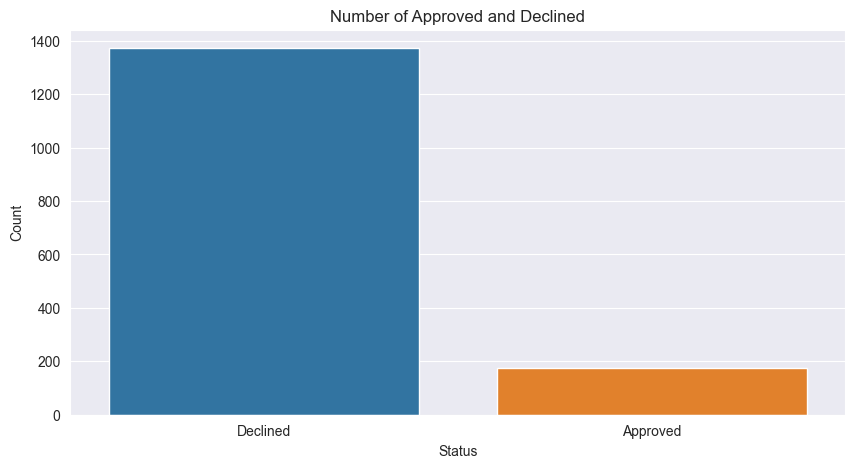

In [27]:


plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df['Status'].value_counts().index, y=df['Approved'].value_counts().values)
plt.title('Number of Approved and Declined')
plt.ylabel('Count');

E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


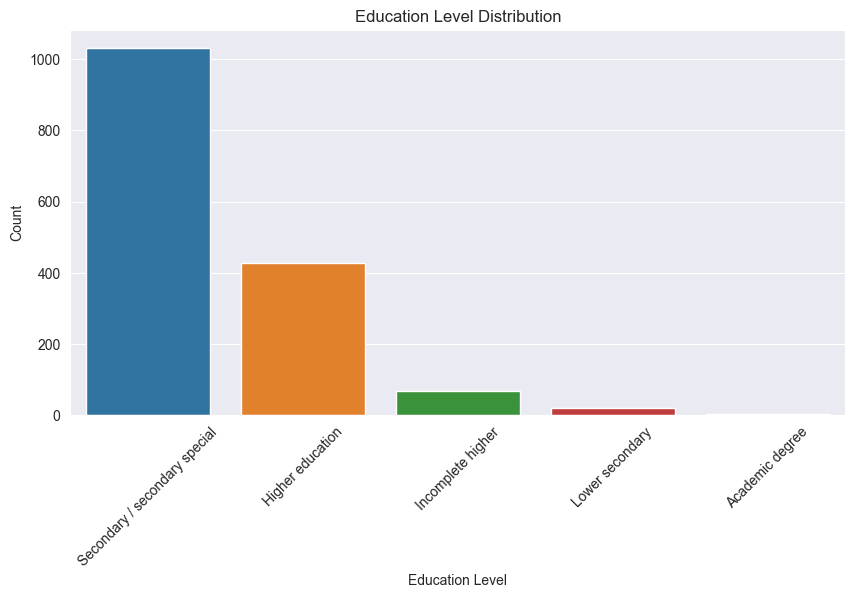

In [28]:
plt.figure(figsize=(10, 5))

eds = df.EDUCATION.value_counts().index
sns.barplot(x=eds, y=df.EDUCATION.value_counts().values)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution')
plt.xticks(rotation=45)
plt.show();

E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


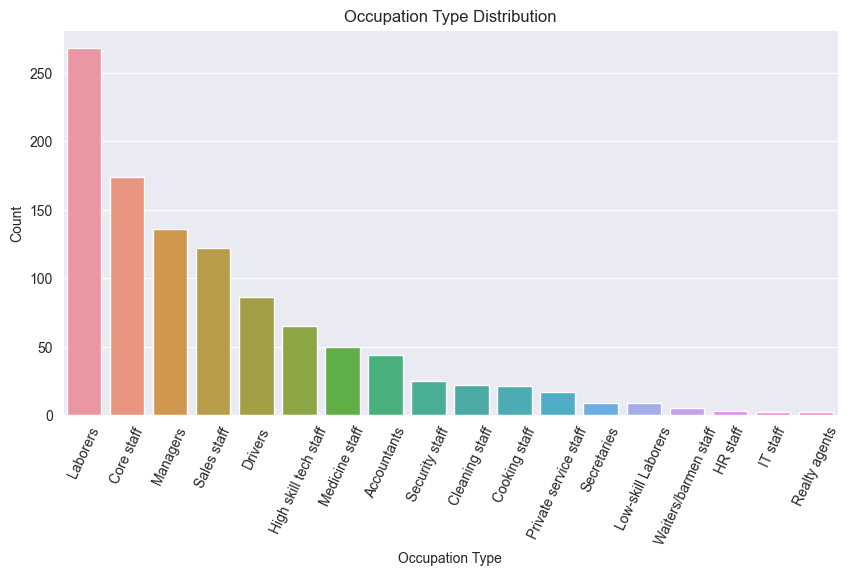

In [29]:
plt.figure(figsize=(10, 5))

occ_types = df.Type_Occupation.value_counts().index
sns.barplot(x=occ_types, y=df.Type_Occupation.value_counts().values)
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Occupation Type Distribution')
plt.xticks(rotation=65)
plt.show();

E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


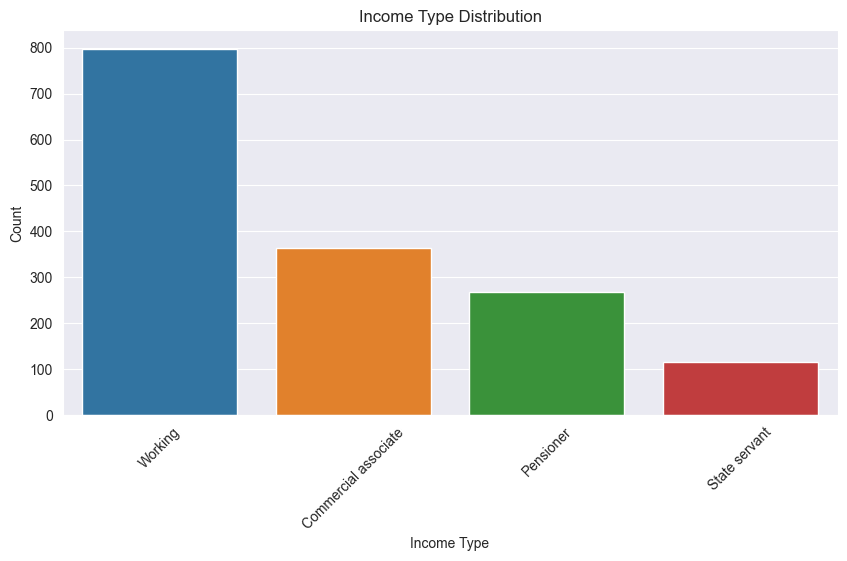

In [30]:
plt.figure(figsize=(10, 5))

occ_types = df.Type_Income.value_counts().index
sns.barplot(x=occ_types, y=df.Type_Income.value_counts().values)
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.title('Income Type Distribution')
plt.xticks(rotation=45)
plt.show()

E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


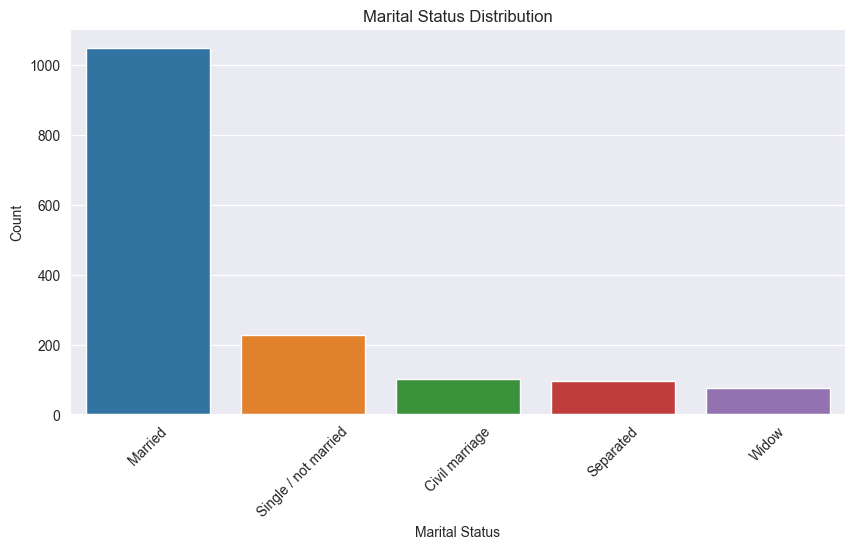

In [31]:
plt.figure(figsize=(10, 5))

marital_types = df.Marital_status.value_counts().index
sns.barplot(x=marital_types, y=df.Marital_status.value_counts().values)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution')
plt.xticks(rotation=45)
plt.show()

E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


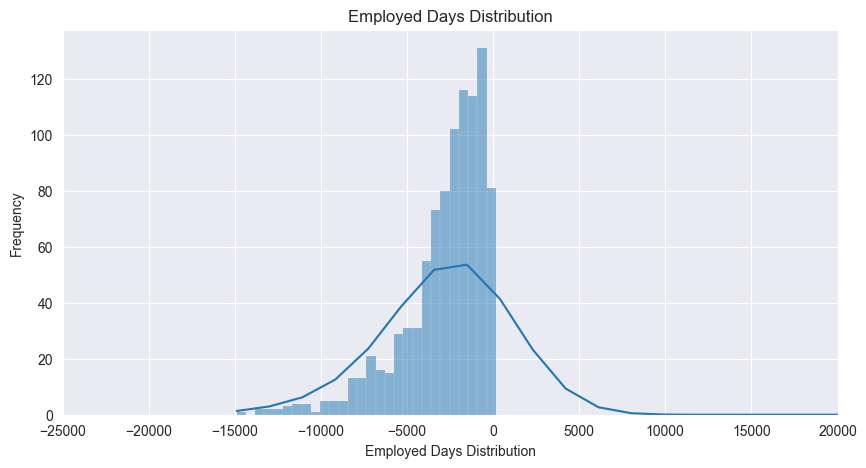

In [32]:
plt.figure(figsize=(10, 5))

emp_days = df.Employed_days.value_counts().index
sns.histplot(x=emp_days, kde=True)
plt.xlabel('Employed Days Distribution')
plt.ylabel('Frequency')
plt.title('Employed Days Distribution')
plt.xlim(-25000, 20000);

E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


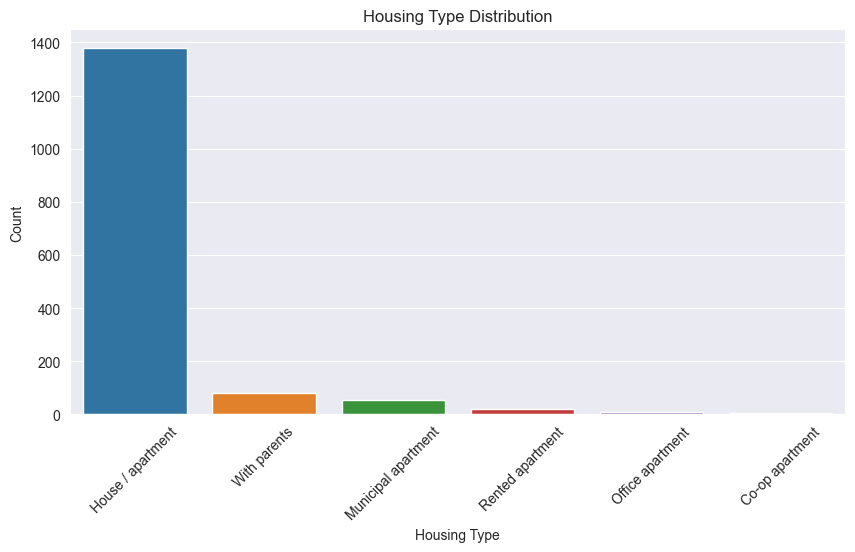

In [33]:
plt.figure(figsize=(10, 5))

housing_types = df.Housing_type.value_counts().index
sns.barplot(x=housing_types, y=df.Housing_type.value_counts().values)
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.title('Housing Type Distribution')
plt.xticks(rotation=45)
plt.show()

In [34]:
cats = [
    'GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income',
    'EDUCATION', 'Marital_status', 'Housing_type', 'Mobile_phone',
    'Work_Phone', 'Phone', 'Type_Occupation', 'EMAIL_ID'
]

conts = [
    'CHILDREN', 'Family_Members', 'Annual_income',
    'Age', 'EmployedDaysOnly', 'UnemployedDaysOnly'
]

In [35]:
def proc_data():
    df['Age'] = -df.Birthday_count // 365
    df['EmployedDaysOnly'] = df.Employed_days.apply(lambda x: x if x > 0 else 0)
    df['UnemployedDaysOnly'] = df.Employed_days.apply(lambda x: abs(x) if x < 0 else 0)

    for cat in cats:
        df[cat] = pd.Categorical(df[cat])

    modes = df.mode().iloc[0]
    df.fillna(modes, inplace=True)

proc_data()

# 1. Выбрать подходящую таблицу данных. Построить и визуализировать дерево решений.

## Учимся на плохом датасете

In [36]:
X, y = df[cats + conts].copy(), df[dep]



X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

X_train[cats] = X_train[cats].apply(lambda x: x.cat.codes)
X_val[cats] = X_val[cats].apply(lambda x: x.cat.codes)

In [48]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [49]:

from sklearn.tree import export_graphviz
export_graphviz(model, out_file='small_tree.dot',feature_names=X.columns, filled=True)
# для этого понадобится библиотека pydot (pip install pydot)
import pydot

graphs = pydot.graph_from_dot_file("small_tree.dot")
graphs[0].write_png("output.png")

Accuracy:  0.9069767441860465
F1 Score:  0.1818181818181818
AUC: 0.3468992248062015


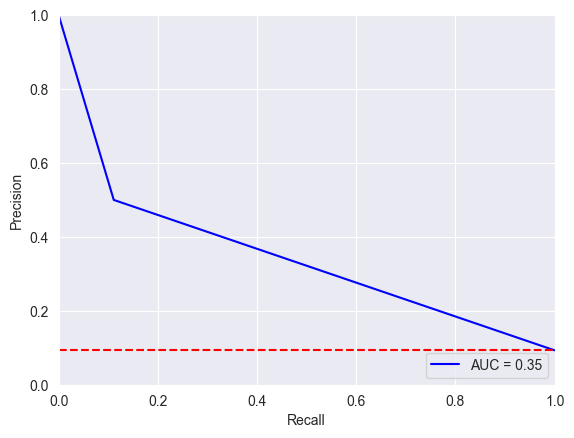

In [59]:
from sklearn.metrics import precision_recall_curve, auc

preds = model.predict(X_val)
acc = accuracy_score(y_val, preds)
f1 = f1_score(y_val, preds)


print('Accuracy: ', acc)
print('F1 Score: ', f1)
precision, recall, _ = precision_recall_curve(y_val, preds)
pr_auc = auc(recall, precision)
print(f"AUC: {pr_auc}")
plt.plot(recall, precision, 'b', label = 'AUC = %0.2f' % pr_auc)
plt.legend(loc = 'lower right')
noskill = len(y_val[y_val==1])/len(y_val)
plt.plot([0, 1], [noskill, noskill],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## Используем  RandomOverSampler

In [60]:
X, y = df[cats + conts].copy(), df[dep]

X_over, y_over = RandomOverSampler().fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_over, y_over, test_size=0.25)

X_train[cats] = X_train[cats].apply(lambda x: x.cat.codes)
X_val[cats] = X_val[cats].apply(lambda x: x.cat.codes)

In [61]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [62]:

from sklearn.tree import export_graphviz
export_graphviz(model, out_file='small_tree_oversample.dot',feature_names=X.columns, filled=True)
# для этого понадобится библиотека pydot (pip install pydot)
import pydot

graphs = pydot.graph_from_dot_file("small_tree_oversample.dot")
graphs[0].write_png("small_tree_oversample.png")

Accuracy:  0.9577874818049491
F1 Score:  0.9565217391304348
AUC: 0.9583333333333333


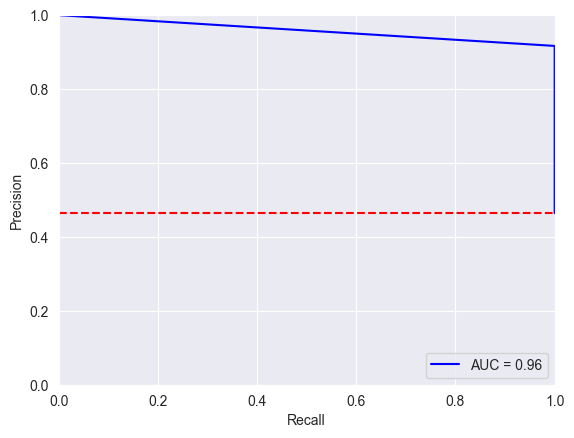

In [63]:
from sklearn.metrics import precision_recall_curve, auc

preds = model.predict(X_val)
acc = accuracy_score(y_val, preds)
f1 = f1_score(y_val, preds)


print('Accuracy: ', acc)
print('F1 Score: ', f1)
precision, recall, _ = precision_recall_curve(y_val, preds)
pr_auc = auc(recall, precision)
print(f"AUC: {pr_auc}")
plt.plot(recall, precision, 'b', label = 'AUC = %0.2f' % pr_auc)
plt.legend(loc = 'lower right')
noskill = len(y_val[y_val==1])/len(y_val)
plt.plot([0, 1], [noskill, noskill],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

# 2. Применить метод градиентного бустинга. Вычислить значимость переменных. Выдать список построенных деревьев.

Accuracy: 0.858806404657933
F1 Score: 0.9565217391304348
AUC: 0.9583333333333333


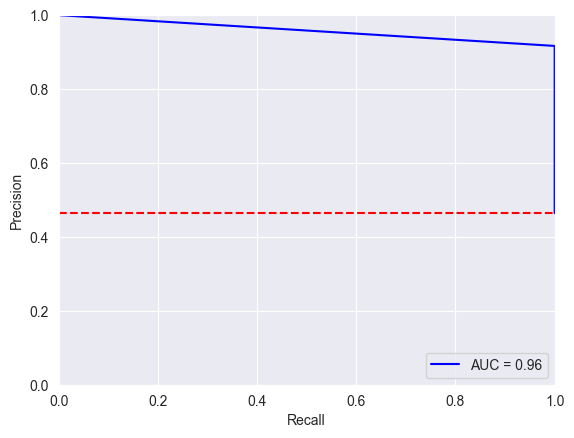

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
# Предсказание на тестовом наборе
y_pred = model.predict(X_val)

# Оценка точности
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, preds)
precision, recall, _ = precision_recall_curve(y_val, preds)
pr_auc = auc(recall, precision)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f"AUC: {pr_auc}")
plt.plot(recall, precision, 'b', label = 'AUC = %0.2f' % pr_auc)
plt.legend(loc = 'lower right')
noskill = len(y_val[y_val==1])/len(y_val)
plt.plot([0, 1], [noskill, noskill],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


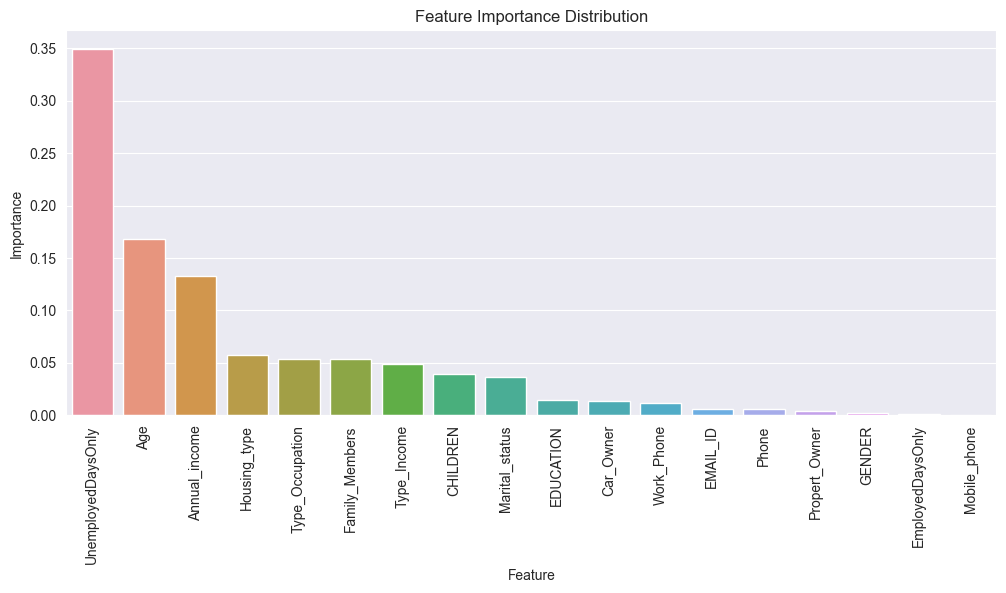

In [65]:
feature_imps = model.feature_importances_

sorted_indexes = feature_imps.argsort()[::-1]

cols = X_train.columns[sorted_indexes]

plt.figure(figsize=(12, 5))

sns.barplot(x=cols, y=feature_imps[sorted_indexes])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Distribution')
plt.xticks(rotation=90)
plt.show();

In [66]:
# Получение списка деревьев
trees = model.estimators_

# Вывод списка деревьев
for i, tree in enumerate(trees):
    print(f'Tree {i+1}:\n{tree[0]}')


Tree 1:
DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x2697EFEAA40)
Tree 2:
DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x2697EFEAA40)
Tree 3:
DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x2697EFEAA40)
Tree 4:
DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x2697EFEAA40)
Tree 5:
DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x2697EFEAA40)
Tree 6:
DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x2697EFEAA40)
Tree 7:
DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x2697EFEAA40)

# 3. Построить зависимость качества решения (на обучении и скользящем контроле) от числа вершин дерева.

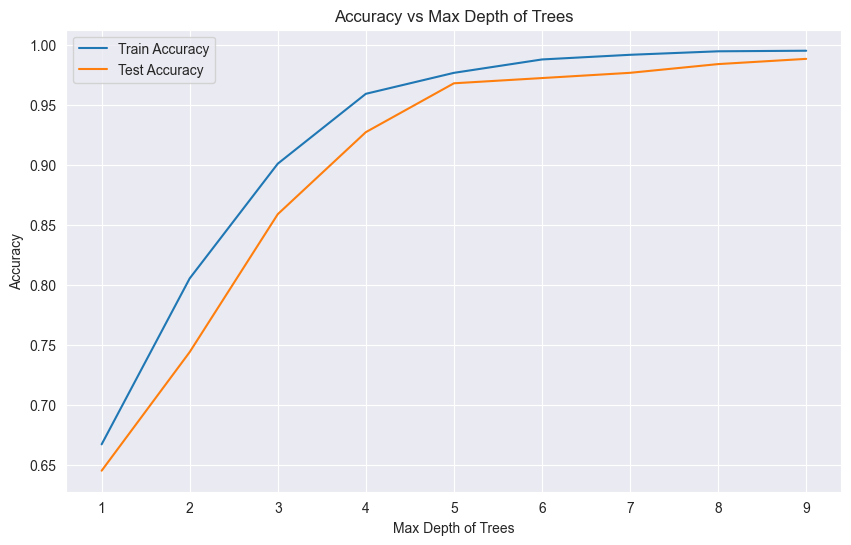

In [67]:
max_depth_values = range(1, 10)

# Создаем списки для хранения точности на обучении и тесте
train_scores = []
test_scores = []

# Обучаем модель для каждого значения глубины дерева
for max_depth in max_depth_values:
    model = GradientBoostingClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Оценка точности на обучающем наборе
    train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_scores.append(train_accuracy)
    
    # Оценка точности на тестовом наборе
    test_pred = model.predict(X_val)
    test_accuracy = accuracy_score(y_val, test_pred)
    test_scores.append(test_accuracy)

# Визуализация зависимости точности от глубины дерева
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_scores, label='Train Accuracy')
plt.plot(max_depth_values, test_scores, label='Test Accuracy')
plt.xlabel('Max Depth of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth of Trees')
plt.legend()
plt.show()

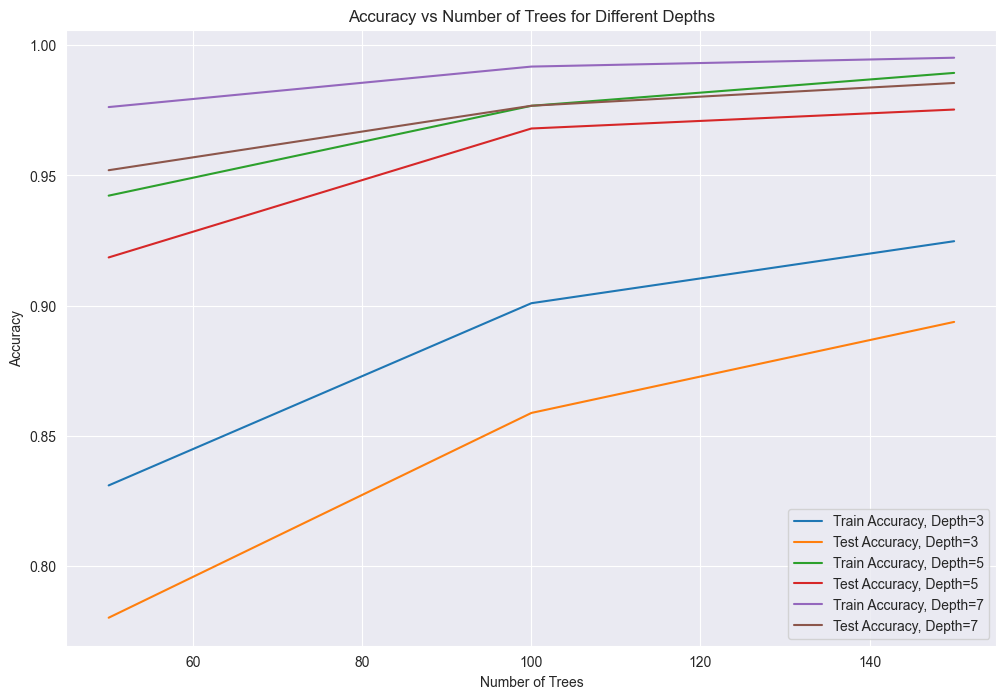

In [68]:
# Задаем значения для числа деревьев и глубины дерева
n_estimators_values = [50, 100, 150]
max_depth_values = [3, 5, 7]

# Создаем списки для хранения точности на обучении и тесте
train_scores = {depth: [] for depth in max_depth_values}
test_scores = {depth: [] for depth in max_depth_values}

# Обучаем модель для каждой комбинации числа деревьев и глубины дерева
for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:
        model = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)
        
        # Оценка точности на обучающем наборе
        train_pred = model.predict(X_train)
        train_accuracy = accuracy_score(y_train, train_pred)
        train_scores[max_depth].append(train_accuracy)
        
        # Оценка точности на тестовом наборе
        test_pred = model.predict(X_val)
        test_accuracy = accuracy_score(y_val, test_pred)
        test_scores[max_depth].append(test_accuracy)

# Визуализация зависимости точности от числа деревьев для разных глубин дерева
plt.figure(figsize=(12, 8))

for max_depth in max_depth_values:
    plt.plot(n_estimators_values, train_scores[max_depth], label=f'Train Accuracy, Depth={max_depth}')
    plt.plot(n_estimators_values, test_scores[max_depth], label=f'Test Accuracy, Depth={max_depth}')

plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Trees for Different Depths')
plt.legend()
plt.show()

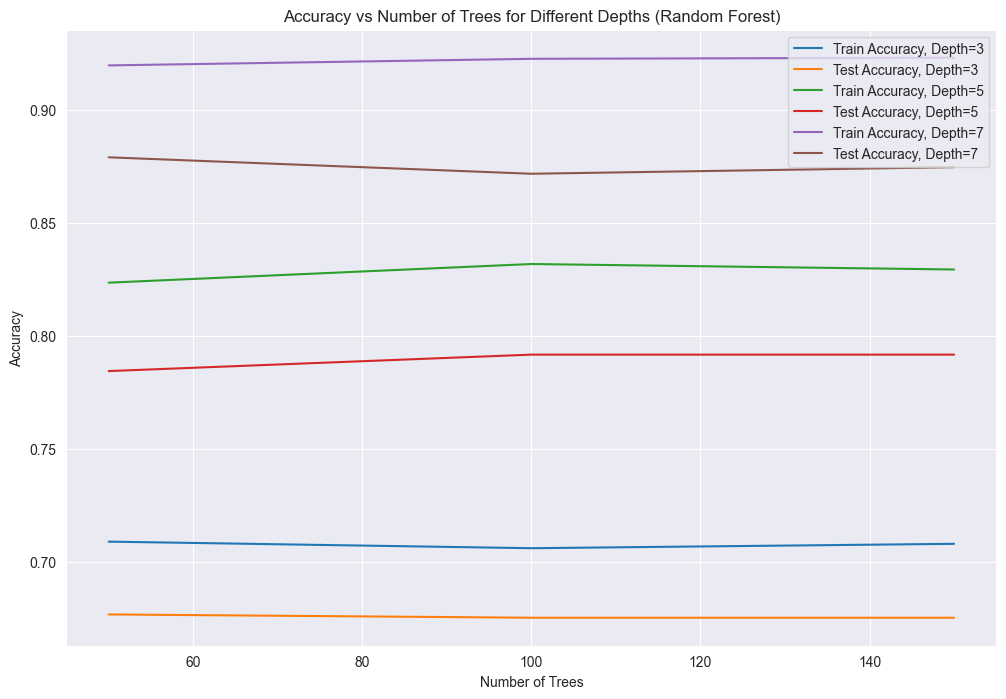

In [69]:
# Задаем значения для числа деревьев и глубины дерева
n_estimators_values = [50, 100, 150]
max_depth_values = [3, 5, 7]

# Создаем списки для хранения точности на обучении и тесте
train_scores = {depth: [] for depth in max_depth_values}
test_scores = {depth: [] for depth in max_depth_values}

# Обучаем модель для каждой комбинации числа деревьев и глубины дерева
for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)
        
        # Оценка точности на обучающем наборе
        train_pred = model.predict(X_train)
        train_accuracy = accuracy_score(y_train, train_pred)
        train_scores[max_depth].append(train_accuracy)
        
        # Оценка точности на тестовом наборе
        test_pred = model.predict(X_val)
        test_accuracy = accuracy_score(y_val, test_pred)
        test_scores[max_depth].append(test_accuracy)

# Визуализация зависимости точности от числа деревьев для разных глубин дерева
plt.figure(figsize=(12, 8))

for max_depth in max_depth_values:
    plt.plot(n_estimators_values, train_scores[max_depth], label=f'Train Accuracy, Depth={max_depth}')
    plt.plot(n_estimators_values, test_scores[max_depth], label=f'Test Accuracy, Depth={max_depth}')

plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Trees for Different Depths (Random Forest)')
plt.legend()
plt.show()